In [105]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.calibration import calibration_curve

In [107]:
from matplotlib import pyplot as plt

In [166]:
X, y = datasets.make_classification(n_samples=5000, weights=[0.5, 0.5])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

In [167]:
np.bincount(y)

array([2498, 2502], dtype=int64)

In [168]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [169]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [170]:
proba = model.decision_function(X_val)
proba2 = model2.predict_proba(X_val)[:, 1]

In [171]:
true, pred = calibration_curve(y_val, proba, normalize=True, n_bins=20)
true2, pred2 = calibration_curve(y_val, proba2, normalize=True, n_bins=20)

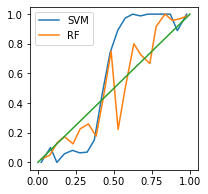

In [172]:
plt.figure(figsize=(3, 3))
plt.plot(pred, true, label="SVM")
plt.plot(pred2, true2, label="RF")
plt.legend()
plt.plot([0, 1], [0, 1])
plt.show()

In [173]:
from sklearn.calibration import CalibratedClassifierCV

In [174]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [175]:
calibrator = CalibratedClassifierCV(model, cv='prefit')
calibrator.fit(X_val, y_val)

CalibratedClassifierCV(base_estimator=SVC(), cv='prefit')

In [179]:
proba = calibrator.predict(X_test)
proba2 = model.decision_function(X_test)

In [180]:
true, pred = calibration_curve(y_test, proba, normalize=True, n_bins=20)
true2, pred2 = calibration_curve(y_test, proba2, normalize=True, n_bins=20)

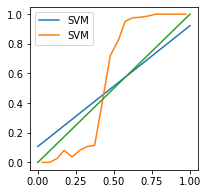

In [181]:
plt.figure(figsize=(3, 3))
plt.plot(pred, true, label="SVM")
plt.plot(pred2, true2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1])
plt.show()

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [18]:
df = pd.DataFrame({"feature1": [1, 1, 0], "feature2": [0, 1, 1], "feature3": [2, 1, 4]})
df

,feature1,feature2,feature3
0,1,0,2
1,1,1,1
2,0,1,4


In [19]:
cosine_similarity(df)

array([[1.        , 0.77459667, 0.86772183],
       [0.77459667, 1.        , 0.70014004],
       [0.86772183, 0.70014004, 1.        ]])

In [20]:
a = np.array([1, 0, 2])
b = np.array([1, 1, 1])

np.sum(a * b) / (np.sqrt(np.sum(a**2)) * np.sqrt(np.sum(b**2)))

0.7745966692414834

In [192]:
from bs4 import BeautifulSoup
import requests
import re
import string
from tqdm.notebook import tqdm

In [193]:
ascii_uppercase = [s for s in string.ascii_uppercase]

In [203]:
headers = []
names = {"Feminine_given_names": [], "Masculine_given_names": []}

for gender, _ in names.items():
    print(gender)
    for letter in tqdm(ascii_uppercase):
        url = "https://en.wikipedia.org/wiki/Category:" + gender + "?from=" + letter
        req = requests.get(url=url, headers=headers)

        soup = BeautifulSoup(req.text, "lxml")

        pages = soup.find("div", {"id": "mw-pages"})
        mw_content_ltr = pages.find("div", {"lang": "en", "dir": "ltr", "class": "mw-content-ltr"})
        mw_category_groups = mw_content_ltr.find_all("div", {"class": "mw-category-group"})

        for group in mw_category_groups:
            first_letter = group.find("h3").text
            if first_letter != letter:
                continue

            lis = group.find_all("li")
            for li in lis:
    #             print(li.find("a").text.split(" ")[0])
                names[gender].append(li.find("a").text.split(" ")[0])

Feminine_given_names



Masculine_given_names


In [204]:
names

{'Feminine_given_names': ['Abba',
  'Abcde',
  'Abena',
  'Abida',
  'Abigail',
  'Abijah',
  'Abou',
  'Acey',
  'Ada',
  'Adalgisa',
  'Adama',
  'Adame',
  'Addie',
  'Adee',
  'Adeline',
  'Adena',
  'Adia',
  'Adina',
  'Aditi',
  'Adora',
  'Adria',
  'Adrianne',
  'Adwoa',
  'Æbbe',
  'Aemilia',
  'Aet',
  'Æthelburh',
  'Afaf',
  'Afreen',
  'Afsana',
  'Afua',
  'Agafya',
  'Agatha',
  'Agboola',
  'Aggrey',
  'Agnė',
  'Agra',
  'Agrippina',
  'Agustina',
  'Ahhotep',
  'Aila',
  'Aileen',
  'Ailsa',
  'Ailsa',
  'Aime',
  'Aimie',
  'Aimone',
  'Aina',
  'Ainslie',
  'Aiva',
  'Aiyana',
  'Ajla',
  'Akosua',
  'Alaina',
  'Alanna',
  'Alba',
  'Alberta',
  'Albina',
  'Albinia',
  'Alda',
  'Aldona',
  'Aleana',
  'Aleena',
  'Aleksa',
  'Alena',
  'Alene',
  'Alessandra',
  'Aletta',
  'Alevtina',
  'Alexa',
  'Alexandra',
  'Alexia',
  'Alexina',
  'Alfonsina',
  'Alia',
  'Alicia',
  'Alide',
  'Aliette',
  'Alima',
  'Aline',
  'Alisha',
  'Aliza',
  'Allene',
  'Allira'

In [206]:
print("Feminine_given_names: ", len(names["Feminine_given_names"]))
print("Masculine_given_names: ", len(names["Masculine_given_names"]))

Feminine_given_names:  1269
Masculine_given_names:  1403


In [207]:
print("Common names:")
len(set(names["Feminine_given_names"]) & set(names["Masculine_given_names"]))

Common names


67

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

In [37]:
data = pd.DataFrame({"par": ["home", "home", "work", "work", "work", "city", "city"],
                     "target": [0, 0, 1, 1, 0, 1, 0]})
data

,par,target
0,home,0
1,home,0
2,work,1
3,work,1
4,work,0
5,city,1
6,city,0


In [38]:
dumm = pd.get_dummies(data["par"])
dumm["target"] = data["target"]
dumm

,city,home,work,target
0,0,1,0,0
1,0,1,0,0
2,0,0,1,1
3,0,0,1,1
4,0,0,1,0
5,1,0,0,1
6,1,0,0,0


In [39]:
df2 = pd.DataFrame()

df2["home"] = dumm["home"].map(dumm.groupby("home")["target"].mean())
df2["work"] = dumm["work"].map(dumm.groupby("work")["target"].mean())
df2["city"] = dumm["city"].map(dumm.groupby("city")["target"].mean())
df2["target"] = data["target"]
df2

,home,work,city,target
0,0.0,0.250000,0.4,0
1,0.0,0.250000,0.4,0
2,0.6,0.666667,0.4,1
3,0.6,0.666667,0.4,1
4,0.6,0.666667,0.4,0
5,0.6,0.250000,0.5,1
6,0.6,0.250000,0.5,0


In [40]:
scaler = StandardScaler()

In [42]:
X = df2.drop("target", axis=1)
y = df2["target"]

X = scaler.fit_transform(X)

clf = LogisticRegression()
# clf = LinearRegression()
clf.fit(X, y)

np.mean(clf.predict(X) == y)

0.7142857142857143

In [20]:
X = dumm.drop("target", axis=1)
y = dumm["target"]

clf = LogisticRegression()
clf.fit(X, y)

clf.predict(X), clf.coef_

(array([0, 0, 1, 1, 1, 0, 0], dtype=int64),
 array([[ 0.1219559 , -0.56499599,  0.44304331]]))